In [1]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [2]:
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [3]:
def fecth_housing_data(housing_url =HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok =True)
    tgz_path = HOUSING_PATH+ "housing.tgz"
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd 

def load_housing_data (housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing_ass= load_housing_data()
housing_ass.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_ass["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing_ass.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
    np.random.seed(42)


In [11]:
import numpy as np 

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    print(test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    print(test_indices)
    train_indices = shuffled_indices[test_set_size:]
    print(train_indices)
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
train_set,test_set = split_train_test(housing_ass,0.2)

4128
[20512 15568  4047 ...  3076 10738  9836]
[18169  9860 17198 ... 17789 18814 16770]


In [38]:
housing_ass["income_cat"] = pd.cut(housing_ass["median_income"],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

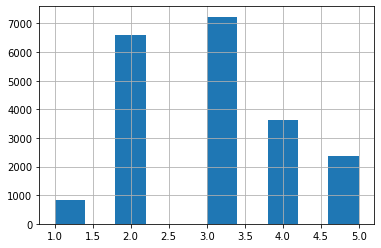

In [39]:
housing_ass["income_cat"].hist()

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_ass, housing_ass["income_cat"]):
    strat_train_set = housing_ass.loc[train_index]
    strat_test_set = housing_ass.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


In [42]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)


3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [43]:
housing_ass["income_cat"].value_counts() / len(housing_ass)


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [45]:
housing_ass = strat_train_set.copy()


NameError: name 'save_fig' is not defined

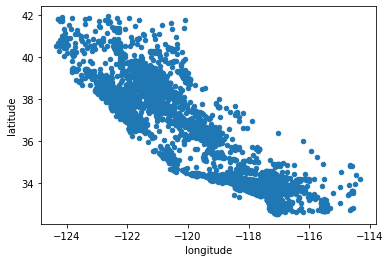

In [48]:
housing_ass.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

NameError: name 'save_fig' is not defined

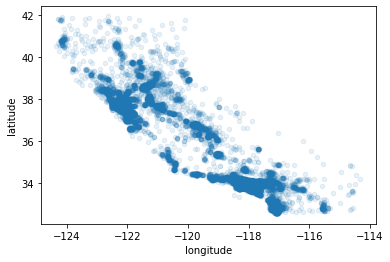

In [50]:
housing_ass.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

NameError: name 'save_fig' is not defined

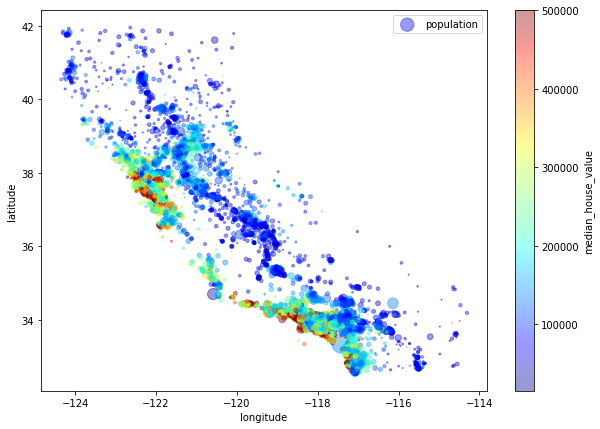

In [55]:
housing_ass.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing_ass["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

NameError: name 'save_fig' is not defined

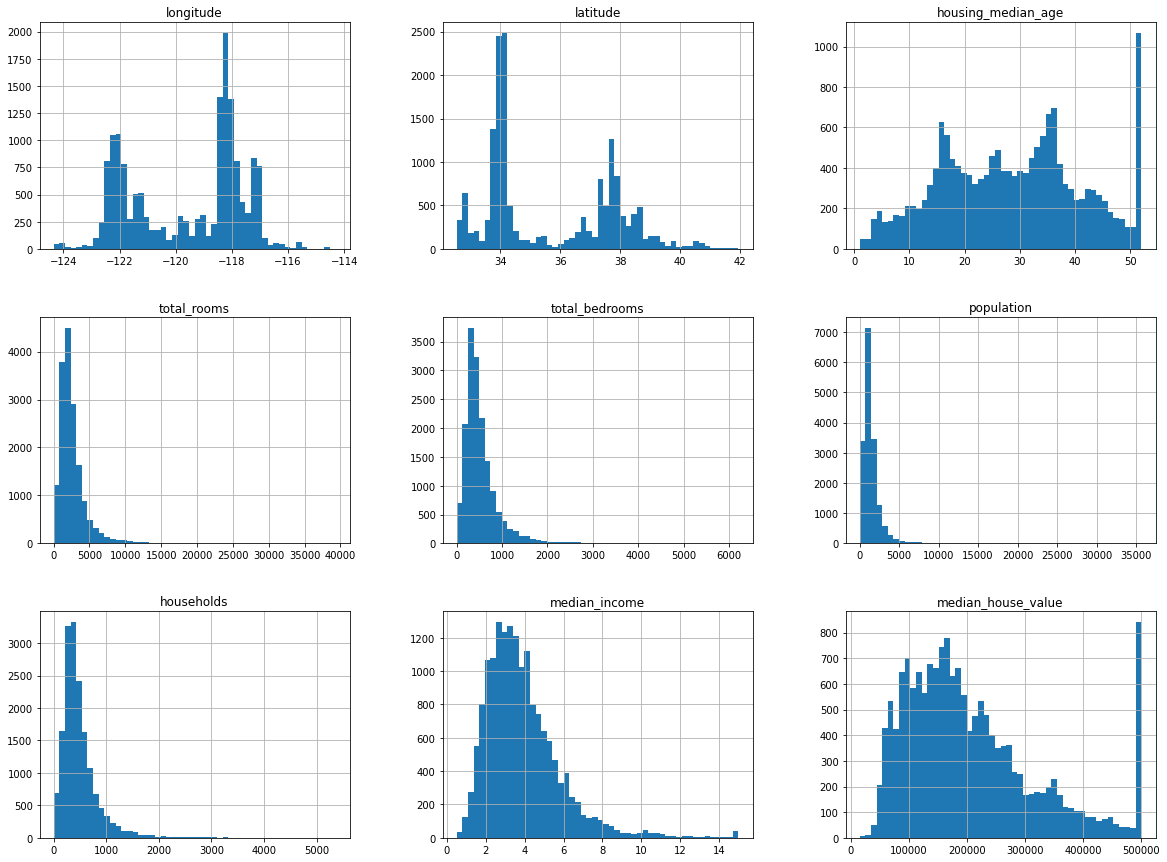

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_ass.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [57]:
corr_matrix = housing_ass.corr()


In [58]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [41]:
housing_ass = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housingass_labels = strat_train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
housing_num = housing_ass.drop("ocean_proximity", axis=1)
print(list(housing_num))


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [64]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [65]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [66]:
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [67]:
X = imputer.transform(housing_num)


In [68]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)


In [69]:
imputer.strategy

'median'

In [29]:
housing_cat = housing_ass[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [71]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [72]:
housing_cat_encoded.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [73]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [75]:
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [76]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_ass.values)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
print(num_attribs)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_ass
                                              )
print(housing_prepared)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


ValueError: A given column is not a column of the dataframe

In [86]:
from sklearn.svm import SVR
sv_m = SVR(kernel ="linear", C=1.0, epsilon=0.2)
sv_m.fit(housing_prepared,housing_labels)

SVR(epsilon=0.2, kernel='linear')

In [87]:
some_data = housing_ass.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", sv_m.predict(some_data_prepared))

Predictions: [169195.12738957 195754.39273315 172636.86652286 170885.04419531
 187808.2047683 ]


In [88]:
print("Labels:", list(some_labels))


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [90]:
from sklearn.metrics import mean_squared_error

housing_predictions = sv_m.predict(housing_prepared)
sv_m_mse = mean_squared_error(housing_labels, housing_predictions)
sv_m_rmse = np.sqrt(sv_m_mse)
sv_m_rmse

111095.0649695881

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [94]:
some_data = housing_ass.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [93]:
print("Labels:", list(some_labels))


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housingass_labels)

ValueError: Number of labels=16512 does not match number of samples=20640